In [46]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# Problema de la moneda

In [2]:
data = np.loadtxt('moneda1.dat',dtype=np.int8,delimiter='\t',skiprows=1)

In [3]:
def priori(p):
    # dado que p es un valor entre 0 y 1
    # daremos una distribucion uniforme para p
    if p<=1 and p>=0:
        return 1
    return 0
v_priori = np.vectorize(priori)
def likelihood(p,n,k):
    return (p**k)*((1-p)**(n-k))

In [4]:
# ¿Cuál es nuestra primera posterior?
def posterior(n,k,N=1000):
    p = np.linspace(0,1,N)
    dx = 1/N
    f_nonormalizada = v_priori(p)*likelihood(p,n,k)
    suma = np.sum(f_nonormalizada*dx)
    return p,f_nonormalizada / suma

Primer dato: [101  37]
probabilidad frecuentista: 36.63%


Text(0.5, 1.0, 'bonito')

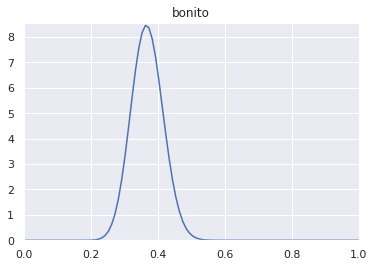

In [33]:
dato = np.sum(data[:5],axis=0)
print("Primer dato:",dato)
print("probabilidad frecuentista: %.2f%%"%(dato[1]*100/dato[0]))
post = posterior(dato[0],dato[1],N=100)
ax = plt.axes()
ax.plot(*post)
ax.set_xlim(0,1)
ax.set_ylim(0,np.max(post)+0.1)
ax.set_title("bonito")

In [34]:
post = posterior(dato[0],dato[1],N=1000)

In [70]:
pmax = np.max(post[1])
p_optimo=post[0][post[1]==pmax][0]
p_optimo

0.3663663663663664

<ipython-input-68-3ff68b4cca7b>:2: RuntimeWarning: divide by zero encountered in log
  ax.plot(((post[0][post[0]>=p_optimo]-p_optimo)**2)[:100],np.log(post[1][post[0]>=p_optimo])[:100],marker='o')


Text(0.5, 1.0, 'bonito')

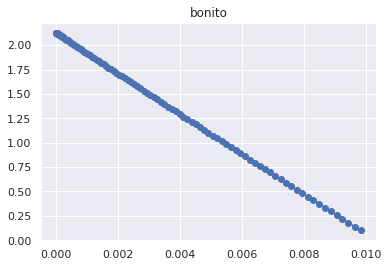

In [68]:
ax = plt.axes()
ax.plot(((post[0][post[0]>=p_optimo]-p_optimo)**2)[:100],np.log(post[1][post[0]>=p_optimo])[:100],marker='o')
ax.set_title("bonito")

In [73]:
X = post[0]
Y = post[1]
print(np.sqrt(
    -1/(
        2*stats.linregress(
            x=((X[X<=p_optimo])[-100:]-p_optimo)**2,
            y=np.log(Y[X<=p_optimo])[-100:]
        )[0]
    )
))
del X,Y

0.045721511934798544


<ipython-input-73-43bfc5d9b9ae>:7: RuntimeWarning: divide by zero encountered in log
  y=np.log(Y[X<=p_optimo])[-100:]


In [74]:
X = post[0]
Y = post[1]
print(np.sqrt(
    -1/(
        2*stats.linregress(
            x=((X[X>=p_optimo])[:100]-p_optimo)**2,
            y=np.log(Y[X>=p_optimo])[:100]
        )[0]
    )
))
del X,Y

0.04918549895120727


<ipython-input-74-50f7894daf0a>:7: RuntimeWarning: divide by zero encountered in log
  y=np.log(Y[X>=p_optimo])[:100]
